In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from src.utils.helpers_sentiment_analysis import *

# Health topic

In [2]:
# Health theme sentiment analysis
df_health = pd.read_csv('src/df_movies_themes/df_movies/movies_health.csv')
df_health = perform_sentiment_analysis(df_health)
df_health[['Decade', 'NLTK_Sentiment', 'TB_Sentiment', 'VADER_Sentiment', 'Emotions_Sentiment', 'Grouped_genres']]

,Decade,NLTK_Sentiment,TB_Sentiment,VADER_Sentiment,Emotions_Sentiment,Grouped_genres
0,2000.0,NEGATIVE,-0.120000,-0.8268,POSITIVE,"['Thriller', 'Mystery', 'Indie', 'Horror', 'Co..."
1,1990.0,POSITIVE,0.168561,0.2732,POSITIVE,['Drama']
2,1970.0,POSITIVE,-0.260000,0.6808,POSITIVE,"['World', 'Drama', 'Romance']"
3,1980.0,NEGATIVE,-0.125000,-0.9449,NEGATIVE,"['Japanese Movies', 'Drama', 'Art film', 'Come..."
4,2000.0,POSITIVE,0.128023,0.7783,POSITIVE,"['Documentary', 'Short Film']"
...,...,...,...,...,...,...
65,2000.0,POSITIVE,0.102869,0.9934,POSITIVE,"['Sports', 'Drama', 'Bollywood', 'Comedy', 'Mu..."
66,1990.0,NEGATIVE,0.063900,-0.0552,POSITIVE,"['Indie', 'Drama', 'Thriller']"
67,1970.0,POSITIVE,0.137963,0.8885,POSITIVE,"['Comedy', 'Drama']"
68,2010.0,POSITIVE,0.233333,0.9042,POSITIVE,"['Horror', 'Thriller']"


In [3]:
sentiment_counts = count_sentiments(df_health)
print(sentiment_counts)

                   | Positive | Negative
-------------------|----------|---------
NLTK_Sentiment     | 36       | 28     
TB_Sentiment       | 42       | 24     
VADER_Sentiment    | 36       | 28     
Emotions_Sentiment | 44       | 23     


We observe that there are more positive movies concerning health than negative ones.

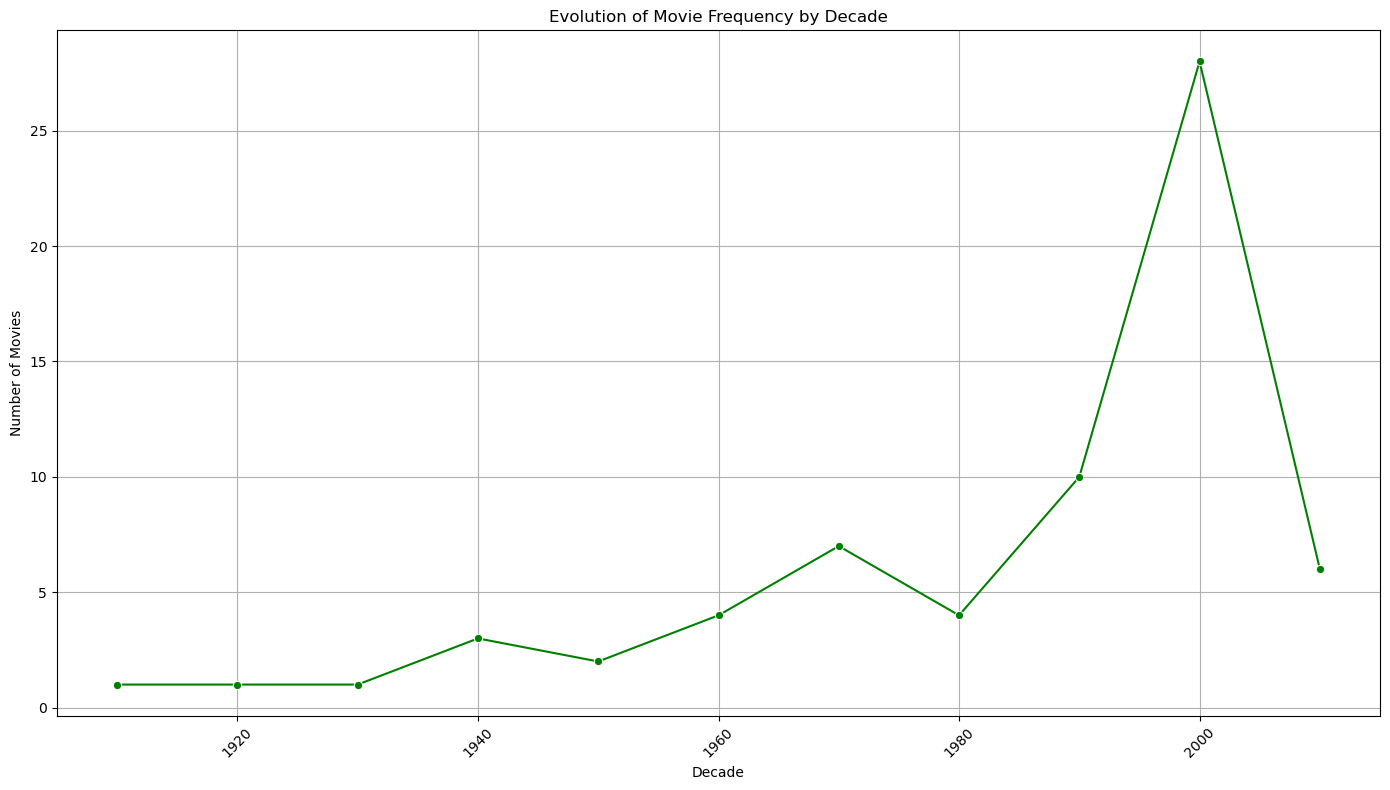

In [4]:
plot_movie_frequency_by_decade(df_health)

We notice a clear peak in the decade 2000 to 2010. [Analyze and compare with news] --> probably in link with SARS-2003?

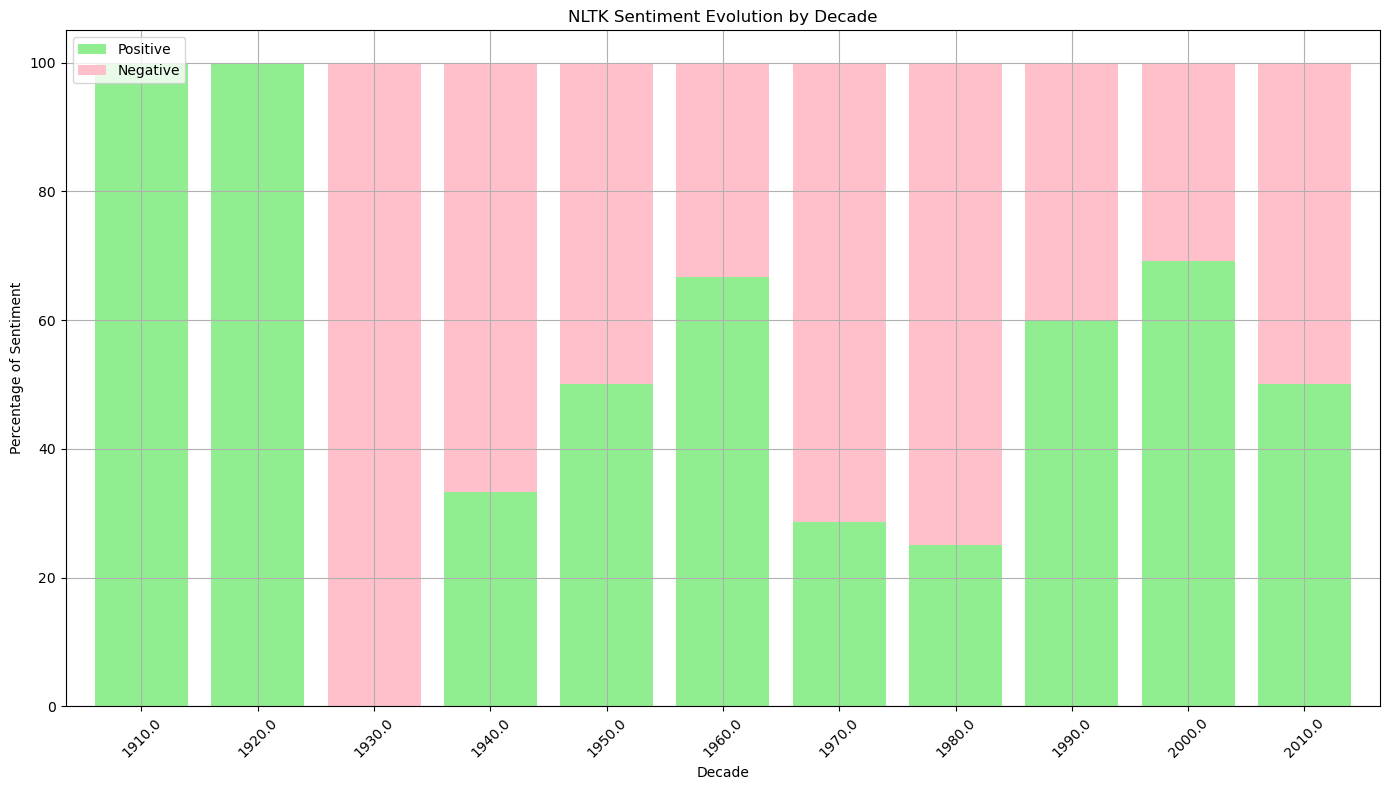

In [5]:
plot_sentiment_by_decade(df_health, technique='NLTK')

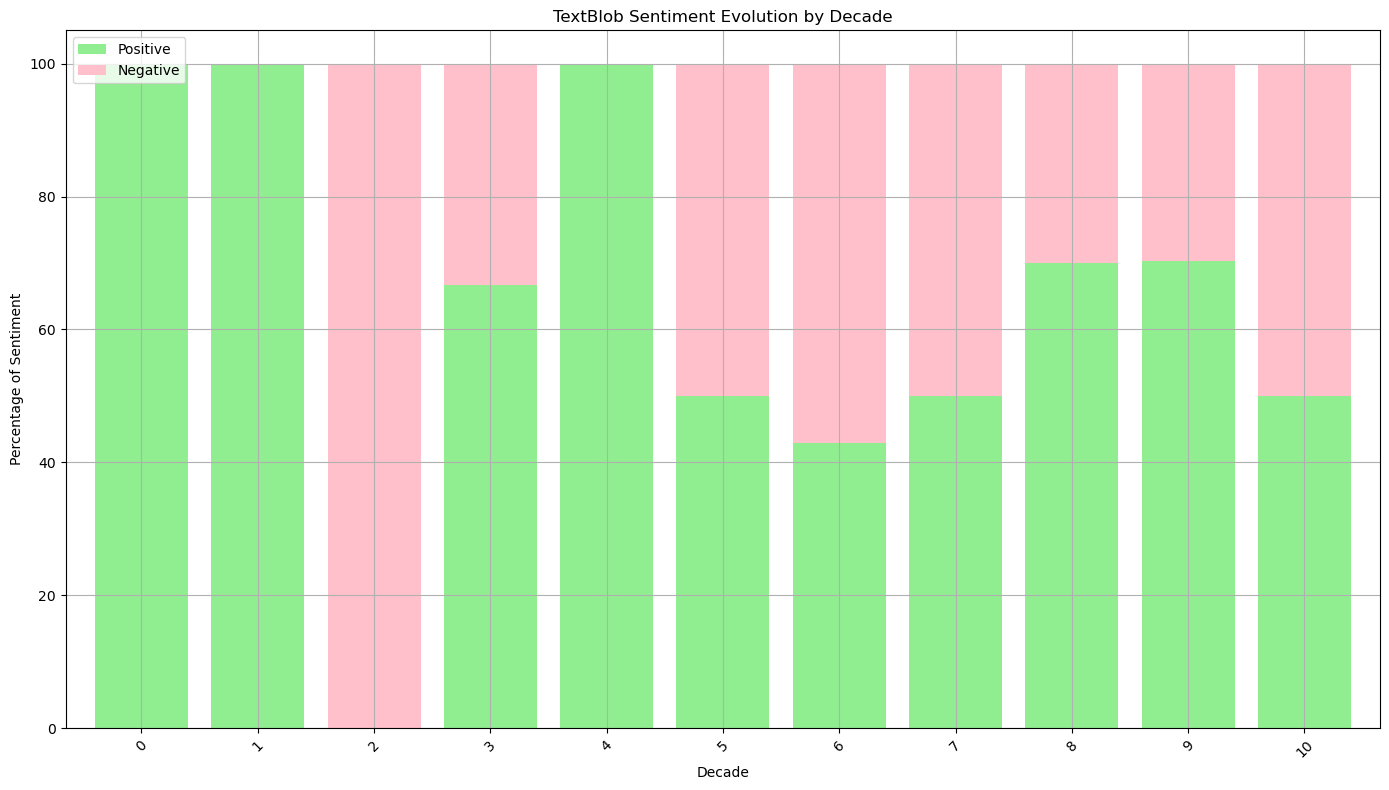

In [6]:
plot_sentiment_by_decade(df_health, technique='TextBlob')

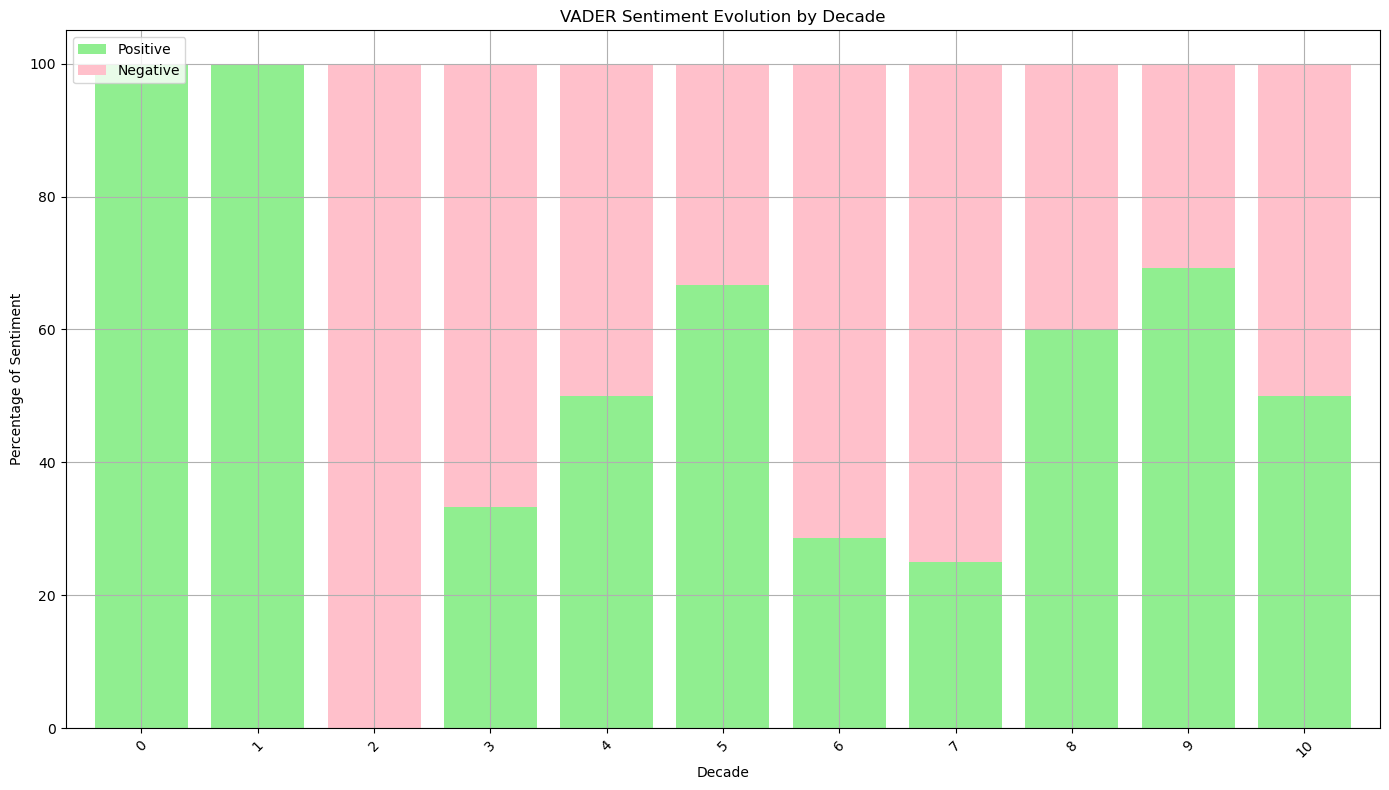

In [7]:
plot_sentiment_by_decade(df_health, technique='VADER')

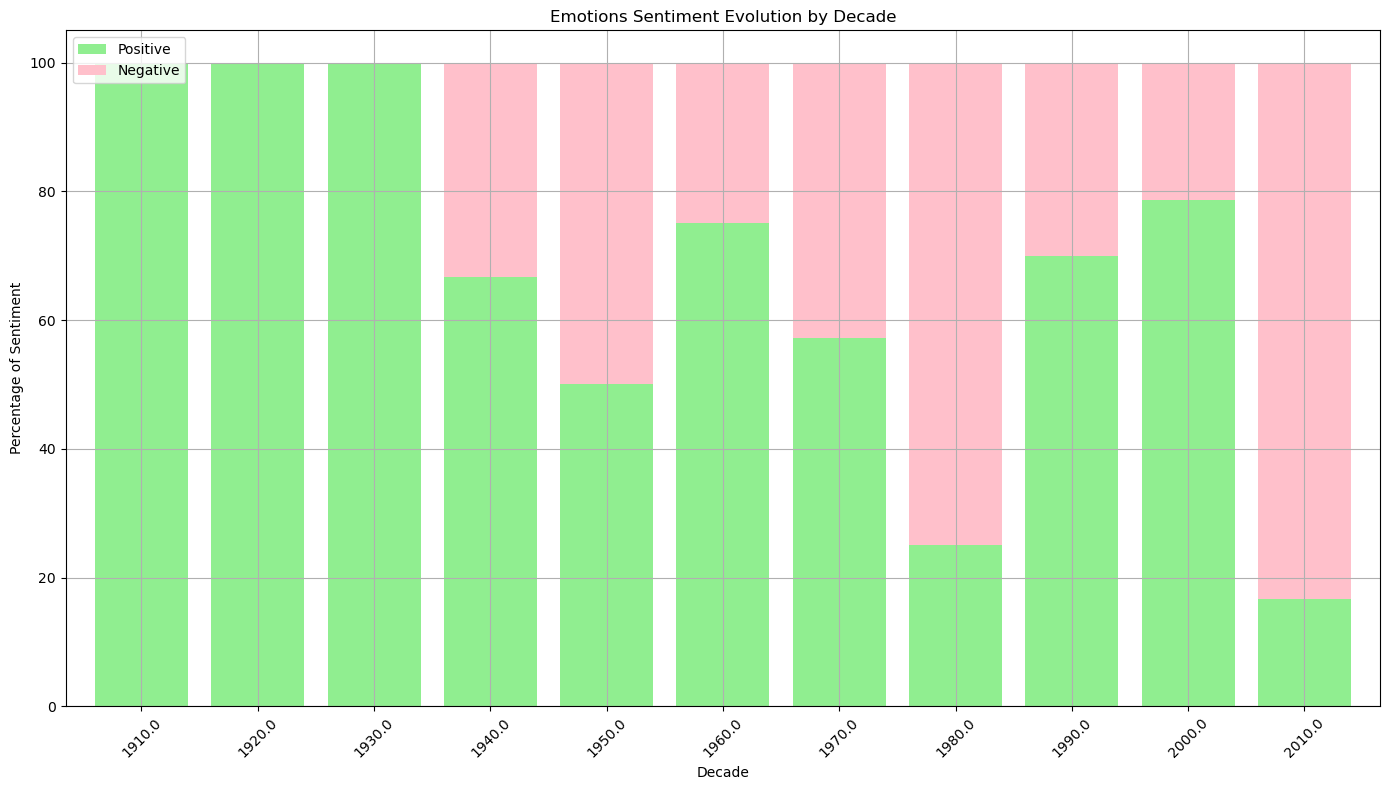

In [8]:
plot_sentiment_by_decade(df_health, technique='Emotions')

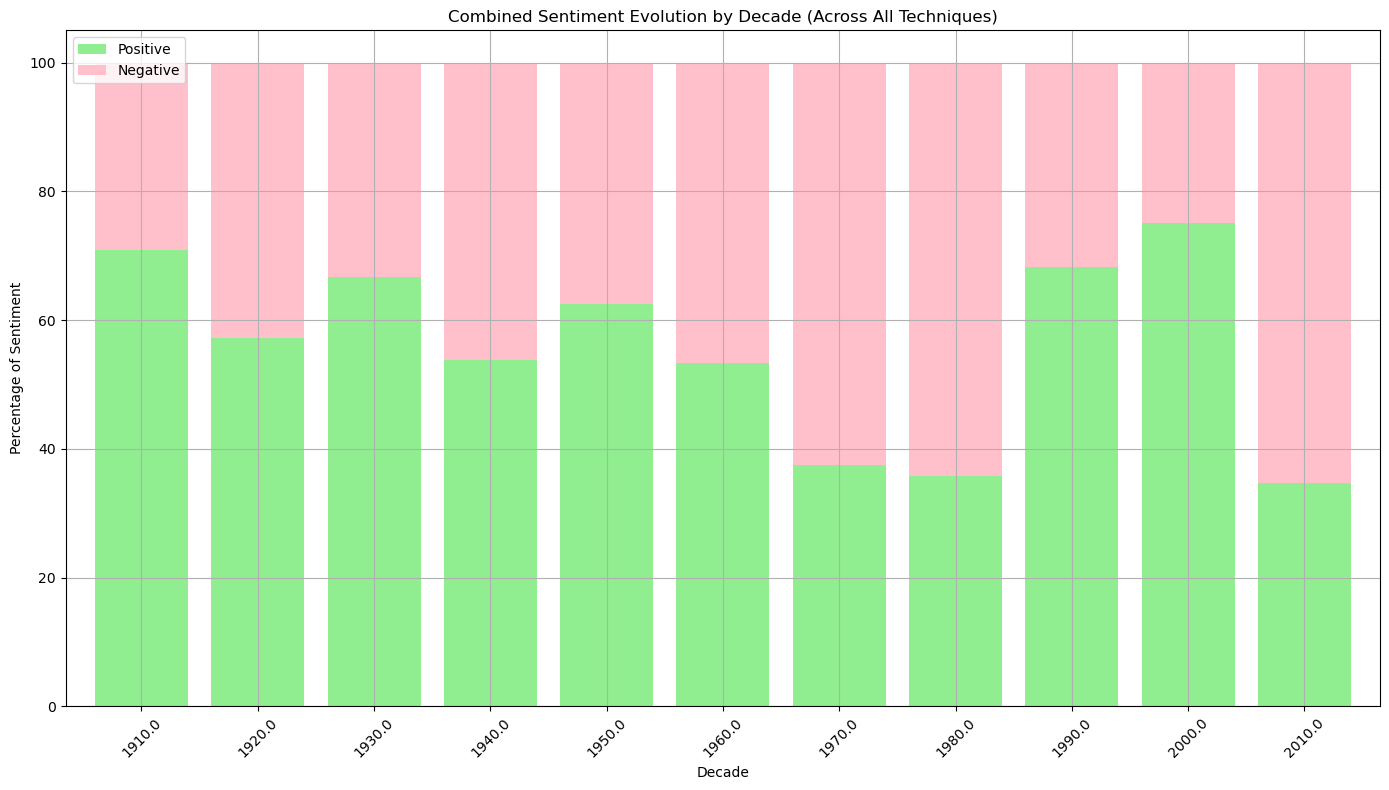

In [9]:
plot_combined_sentiment_by_decade(df_health)

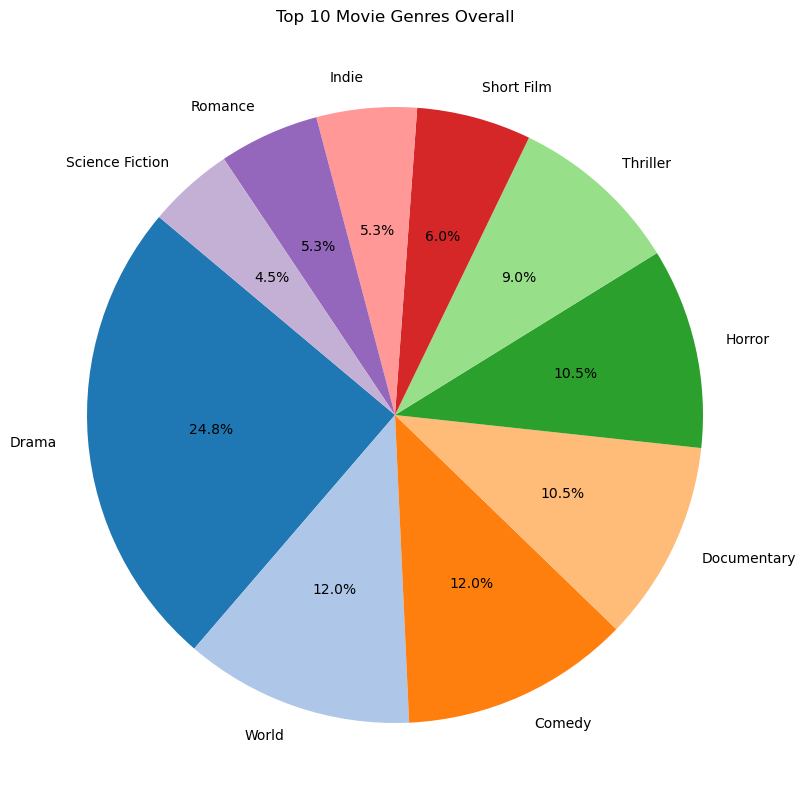

In [10]:
plot_top_genres_overall(10, df_health)

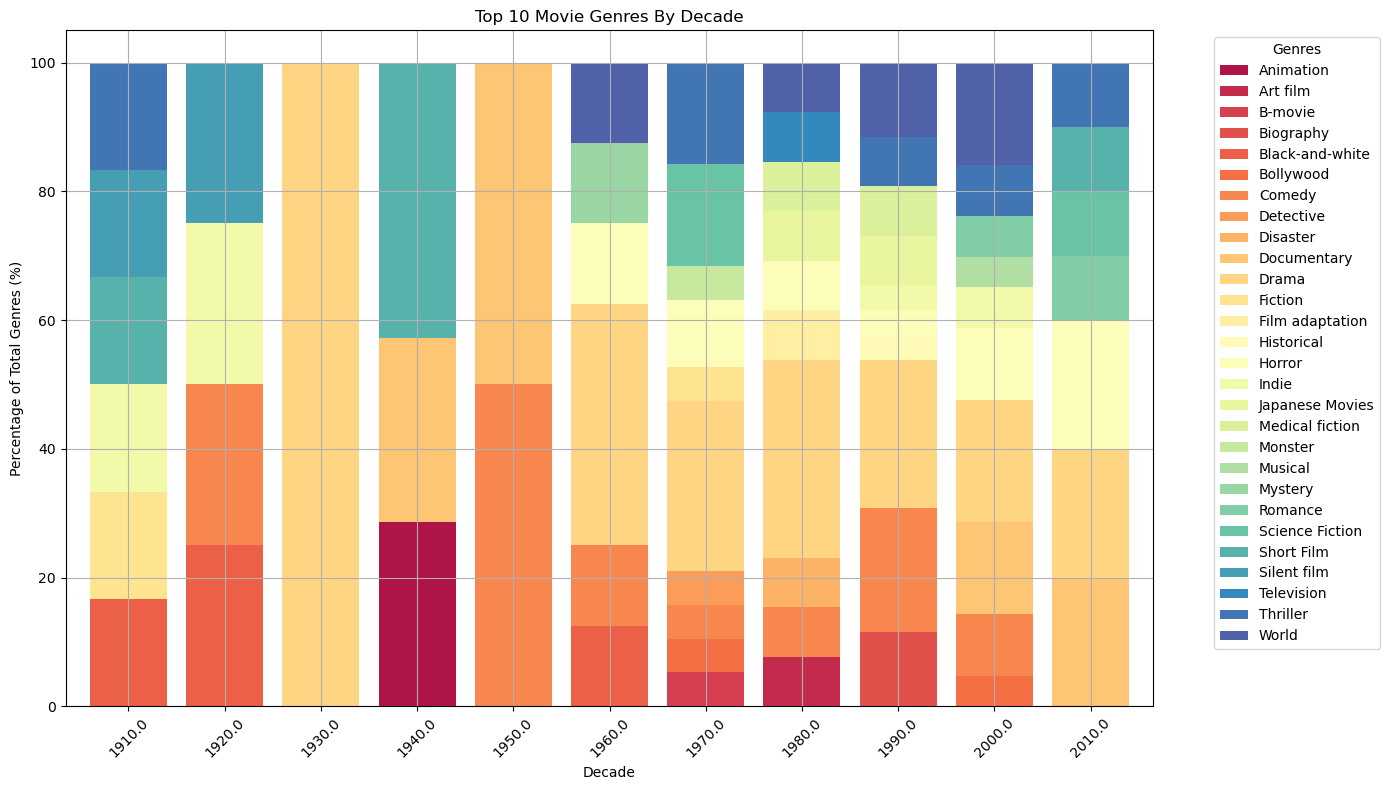

In [11]:
# [TODO] find better colors and fix the legend (display only the top 10 genres representated in graph)
plot_top_genres(10, df_health)